In [1]:
import numpy as np
import cv2
import pandas as pd
import glob
from sklearn import svm
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

#For CNN
from keras.layers.core import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential






# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
def boundingBoxFromXML(path):
    '''takes and XML file path, returns the four corners of a bounding box
        depends on python xml 
        import xml.etree.ElementTree as ET
    '''
    
    #import the xml file and set a root
    tree = ET.parse(path)
    root = tree.getroot()
    
    #navigate to the bounding box
    root = root.find('object')    
    root = root.find('bndbox')
    
    #get the corners, order is xmin, ymin, xmax, ymax
    output = []
    for child in root:
        output.append( int(child.text) )
        
    return output

def getColorHistogram_X(image, channel):
    '''Takes and image and a target channel
        returns a color histrogam along the width of the image
    '''
    
    #container for results
    hist = []

    #loop over all the cols
    for i in range(image.shape[1]):

        #get the ith column
        col = image[:,i]

        #use numpy to get the sum of each channel for this col
        counts = np.sum(col, axis = 0)

        #return only the channel requested
        hist.append(counts[channel])

    return hist

def getColorHistogram_Y(image, channel):
    '''Takes and image and a target channel
        returns a color histrogam along the height of the image
    '''
    
    #container for results
    hist = []

    #loop over all the cols
    for i in range(image.shape[0]):

        #get the ith column
        col = image[i,:]

        #use numpy to get the sum of each channel for this col
        counts = np.sum(col, axis = 0)

        #return only the channel requested
        hist.append(counts[channel])

    return hist

In [3]:
#first read the image file paths
shipImagePaths = glob.glob("MASATI-v2/ship/*.png")

#next read the xml label file paths
shipLabelPaths = glob.glob("MASATI-v2/ship_labels/*.xml")

#container for ship images
imagesOfShips = []

#next loop over all the images and parse the XML file along the way
for i in range(800):  #for now just 100 images
    
    #read the image with opencv
    image = cv2.imread(shipImagePaths[i])
    
    #parse the XML file to get the bounding box
    box = boundingBoxFromXML(shipLabelPaths[i])
    
    #crop out the ship using numpy
    imageCropped = image[box[1]:box[3], box[0]:box[2]] #[y:y+h, x:x+w] 
    
    #record the image
    imagesOfShips.append(imageCropped)

In [30]:
#read the ocean image paths
oceanImagePaths = glob.glob("MASATI-v2/water/*.png")

#container for ocean images
imagesOfOcean = []

#loop 
for i in range(800):
    
    #read in the image with opencv
    imagesOfOcean.append(cv2.imread(oceanImagePaths[i]))

In [21]:
#normalization
imagesOfShips = np.array(imagesOfShips)/255.
#imagesOfOcean = np.array(imagesOfOcean)/255.


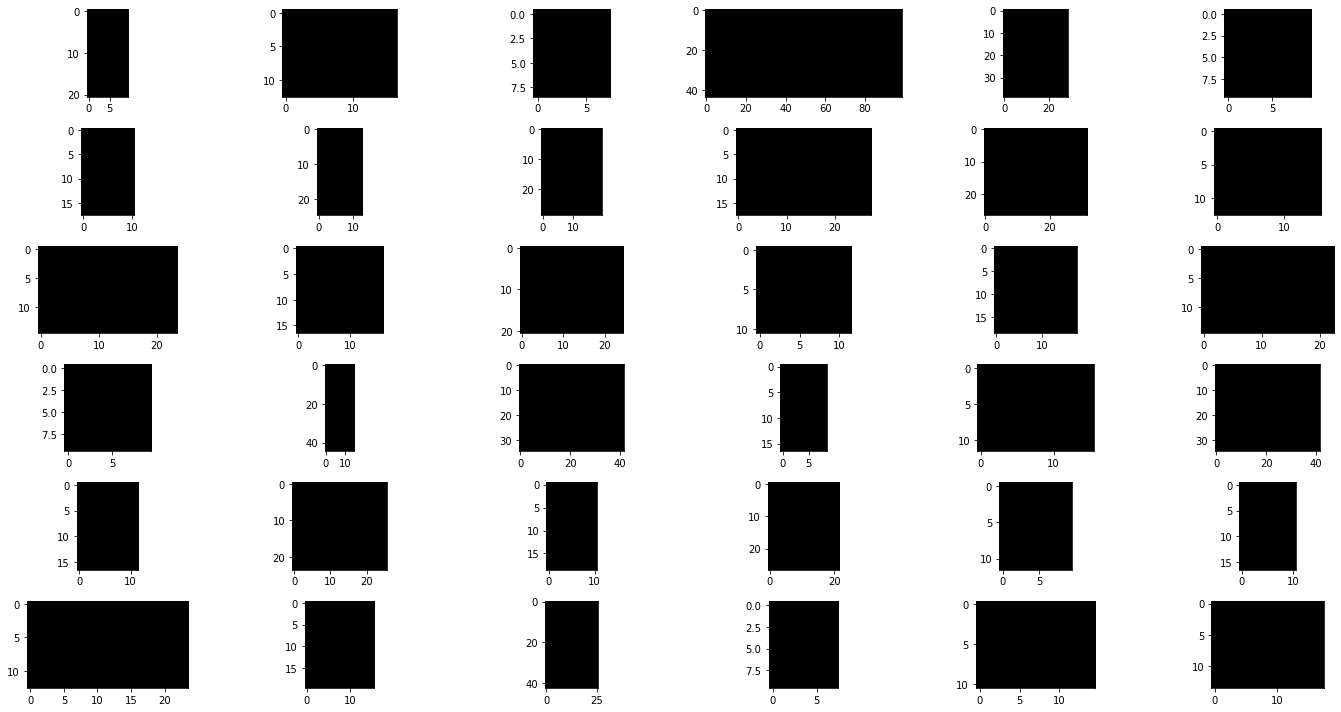

In [22]:
#plt subplot setup
fig, axs = plt.subplots(6, 6, figsize=(20, 10)) 

#loop to plot some random images for visulaztion purposes
for i in range(6):
    for j in range(6):
        axs[i, j].imshow(imagesOfShips[np.random.randint(len(imagesOfShips))])
    
plt.tight_layout()
plt.show()

In [23]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation="relu",input_shape = (30,30,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=1))
model.add(Flatten())
model.add(Dense(2))
#model.compile(loss=loss_fn, optimizer='adam')
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.compile(loss='cat_crossentropy', optimizer='adam')
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 86530     
Total params: 88,322
Trainable params: 88,322
Non-trainable params: 0
_________________________________________________________________


In [24]:
#model.fit(X_train, y_train, batch_size = 10, epochs = 5 ))